In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
# E-mail spam data
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crl.tot  4601 non-null   int64  
 1   dollar   4601 non-null   float64
 2   bang     4601 non-null   float64
 3   money    4601 non-null   float64
 4   n000     4601 non-null   float64
 5   make     4601 non-null   float64
 6   yesno    4601 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 251.7+ KB


In [4]:
# Data Analysis

In [5]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


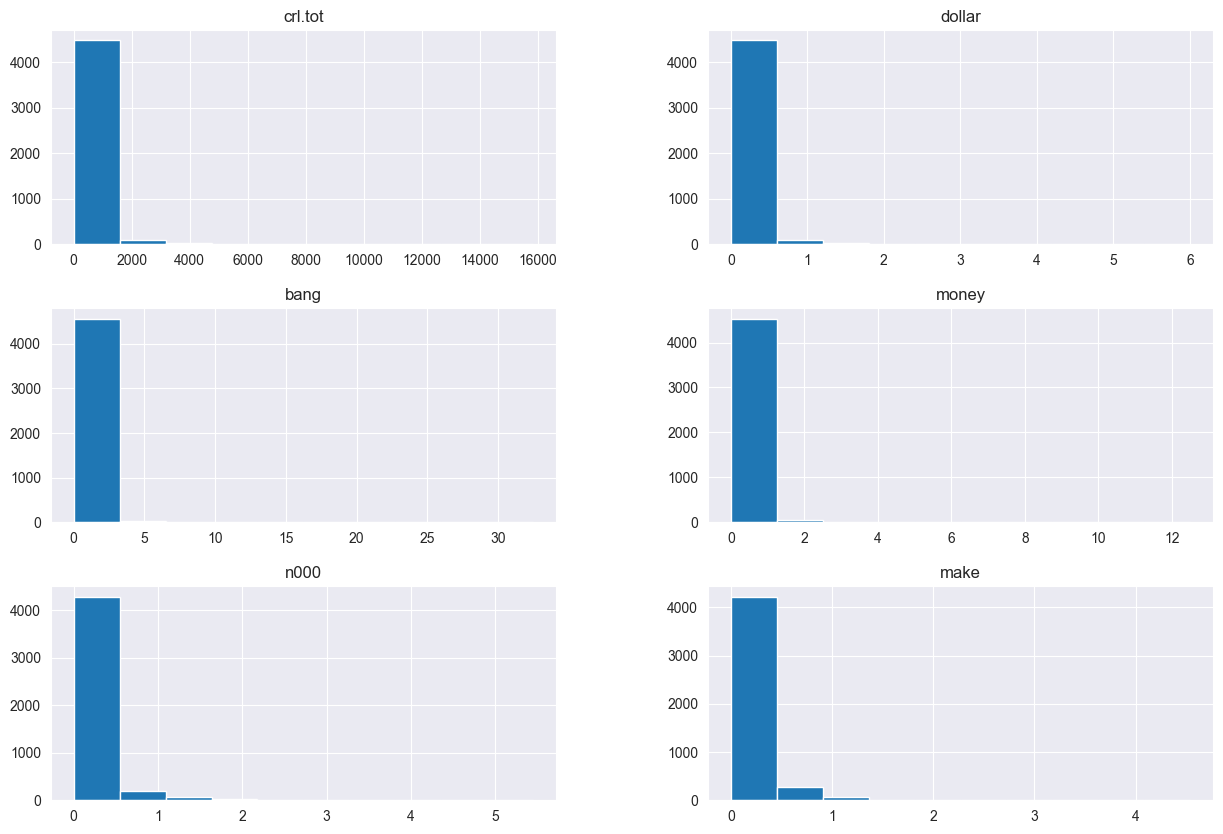

In [6]:
df.hist(figsize=(15,10))
plt.show()

In [7]:
# Removing outliers
print(len(df))
df = df[df['crl.tot'] < 1500]
df = df[df['bang'] < 3]
df = df[df['money'] < 4]
print(len(df))

4601
4412


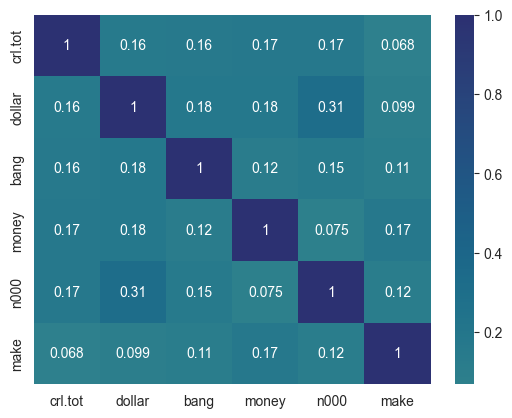

In [9]:
# Compute and plot the correlation matrix for numerical columns
sns.heatmap(df.corr(numeric_only=True),
            annot = True,
            cmap = 'crest',
            center = 0)
plt.show()

# Logistic Regression Preparation

In [11]:
# Prepare the dependent variable
df['yesno'] = np.where(df['yesno'] == 'y', 1, 0) # Convert 'yesno' column: replace 'y' with 1 and other values with 0